## Použití metody shift

V některých případech se v datech potřebujeme podívat o řádek výše nebo níže, často to může být v souvislosti s datem a časem. Uvažujme například nějaký program, který zapisuje začátek a konec nějaké události. Událost a její typ vždy zapíše jako samostatný řádek. Abychom zjistili délku události, potřebujeme spočítat rozdíl mezi hodnotami data a času ve dvou řádích. K tomu slouží metoda `shift`.

Uvažujme například zařízení, které monitoruje výpadky televizního signálu. Zařízení zapisuje záznamy o začátku a konci výpadku do logovacího souboru.


In [2]:
import pandas

signal_monitoring = pandas.read_csv("signal_monitoring.csv")
signal_monitoring["event_date_time"] = pandas.to_datetime(signal_monitoring["event_date_time"])
signal_monitoring.head()

,event_type,event_date_time
0,signal lost,2021-02-03 00:40:08
1,signal restored,2021-02-03 01:14:11
2,signal lost,2021-02-05 19:14:19
3,signal restored,2021-02-05 19:46:29
4,signal lost,2021-02-06 14:31:34


Nyní použijeme metodu `shift` na sloupec `event_date_time`. Pomocí metody pak přidáme k tabulce **nový sloupec**. Nejdůležitějším parametrem metody je parametr `periods`, který může mít kladnou nebo zápornou hodnotu.

- Kladná hodnota parametru `periods` znamená, že hodnoty budou posunuty směrem dolů.
- Záporná hodnota parametru `periods` znamená, že hodnoty budou posunuty směrem nahoru.

Pro náš případ bude ideální, pokud posuneme hodnoty sloupce `event_date_time` o jeden řádek směrem nahoru. Tím zajistíme, že pokud má sloupec `event_type` hodnotu `signal lost`, uvidíme v jednom řádku začátek i konec výpadku. Tím padem bude stačit tyto hodnoty od sebe odečíst. Pro `event_type` `signal restored` nebude mít tato hodnota smysl, ale to nevadí, tyto řádky můžeme pomocí dotazu z tabulky odfiltrovat.

In [3]:
signal_monitoring["event_end_date_time"] = signal_monitoring["event_date_time"].shift(periods=-1)
signal_monitoring.head()

,event_type,event_date_time,event_end_date_time
0,signal lost,2021-02-03 00:40:08,2021-02-03 01:14:11
1,signal restored,2021-02-03 01:14:11,2021-02-05 19:14:19
2,signal lost,2021-02-05 19:14:19,2021-02-05 19:46:29
3,signal restored,2021-02-05 19:46:29,2021-02-06 14:31:34
4,signal lost,2021-02-06 14:31:34,2021-02-06 14:48:24


Nyní odebereme přebytečné řádky.

In [4]:
signal_monitoring = signal_monitoring[signal_monitoring["event_type"] == "signal lost"]
signal_monitoring.head()

,event_type,event_date_time,event_end_date_time
0,signal lost,2021-02-03 00:40:08,2021-02-03 01:14:11
2,signal lost,2021-02-05 19:14:19,2021-02-05 19:46:29
4,signal lost,2021-02-06 14:31:34,2021-02-06 14:48:24
6,signal lost,2021-02-08 04:59:20,2021-02-08 05:38:29
8,signal lost,2021-02-09 14:21:25,2021-02-09 14:42:22


Nyní můžeme snadno přidat výpočet délky výpadku signálu.

In [5]:
signal_monitoring["outage_length"] = signal_monitoring["event_end_date_time"] - signal_monitoring["event_date_time"]
signal_monitoring.head()

,event_type,event_date_time,event_end_date_time,outage_length
0,signal lost,2021-02-03 00:40:08,2021-02-03 01:14:11,0 days 00:34:03
2,signal lost,2021-02-05 19:14:19,2021-02-05 19:46:29,0 days 00:32:10
4,signal lost,2021-02-06 14:31:34,2021-02-06 14:48:24,0 days 00:16:50
6,signal lost,2021-02-08 04:59:20,2021-02-08 05:38:29,0 days 00:39:09
8,signal lost,2021-02-09 14:21:25,2021-02-09 14:42:22,0 days 00:20:57


Nyní můžeme například vypočítat celkovou délku výpadků signálu v jednotlivých dnech.

In [6]:
signal_monitoring_grouped = signal_monitoring.groupby(signal_monitoring["event_date_time"].dt.date)["outage_length"].sum()
signal_monitoring_grouped.head()

event_date_time
2021-02-03   0 days 00:34:03
2021-02-05   0 days 00:32:10
2021-02-06   0 days 00:16:50
2021-02-08   0 days 00:39:09
2021-02-09   0 days 00:44:38
Name: outage_length, dtype: timedelta64[ns]

Jako poslední krok si ukážeme, jak prezentovat výsledky našeho výpočtu pomocí grafu. Abychom mohli použít sloupcový graf, musíme převést typ `timedelta` na číselnou hodnotu. To zařídíme pomocí vlastnosti `dt.total_seconds`.

<AxesSubplot:xlabel='event_date_time'>

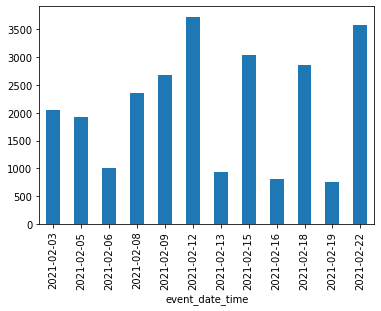

In [7]:
signal_monitoring_grouped_seconds = signal_monitoring_grouped.dt.total_seconds()
signal_monitoring_grouped_seconds.plot(kind="bar")